### Glass Classification using KNN

#### Data Description
* RI : refractive index
* Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
* Mg: Magnesium
* AI: Aluminum
* Si: Silicon
*  K: Potassium
* Ca: Calcium
* Ba: Barium
* Fe: Iron

Type: Type of glass: (class attribute)
* 1 -- building_windows_float_processed
* 2 --building_windows_non_float_processed
* 3 --vehicle_windows_float_processed
* 4 --vehicle_windows_non_float_processed (none in this database)
* 5 --containers
* 6 --tableware
* 7 --headlamps

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Glass Data

In [2]:
glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Exploratory Data Analysis

In [3]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


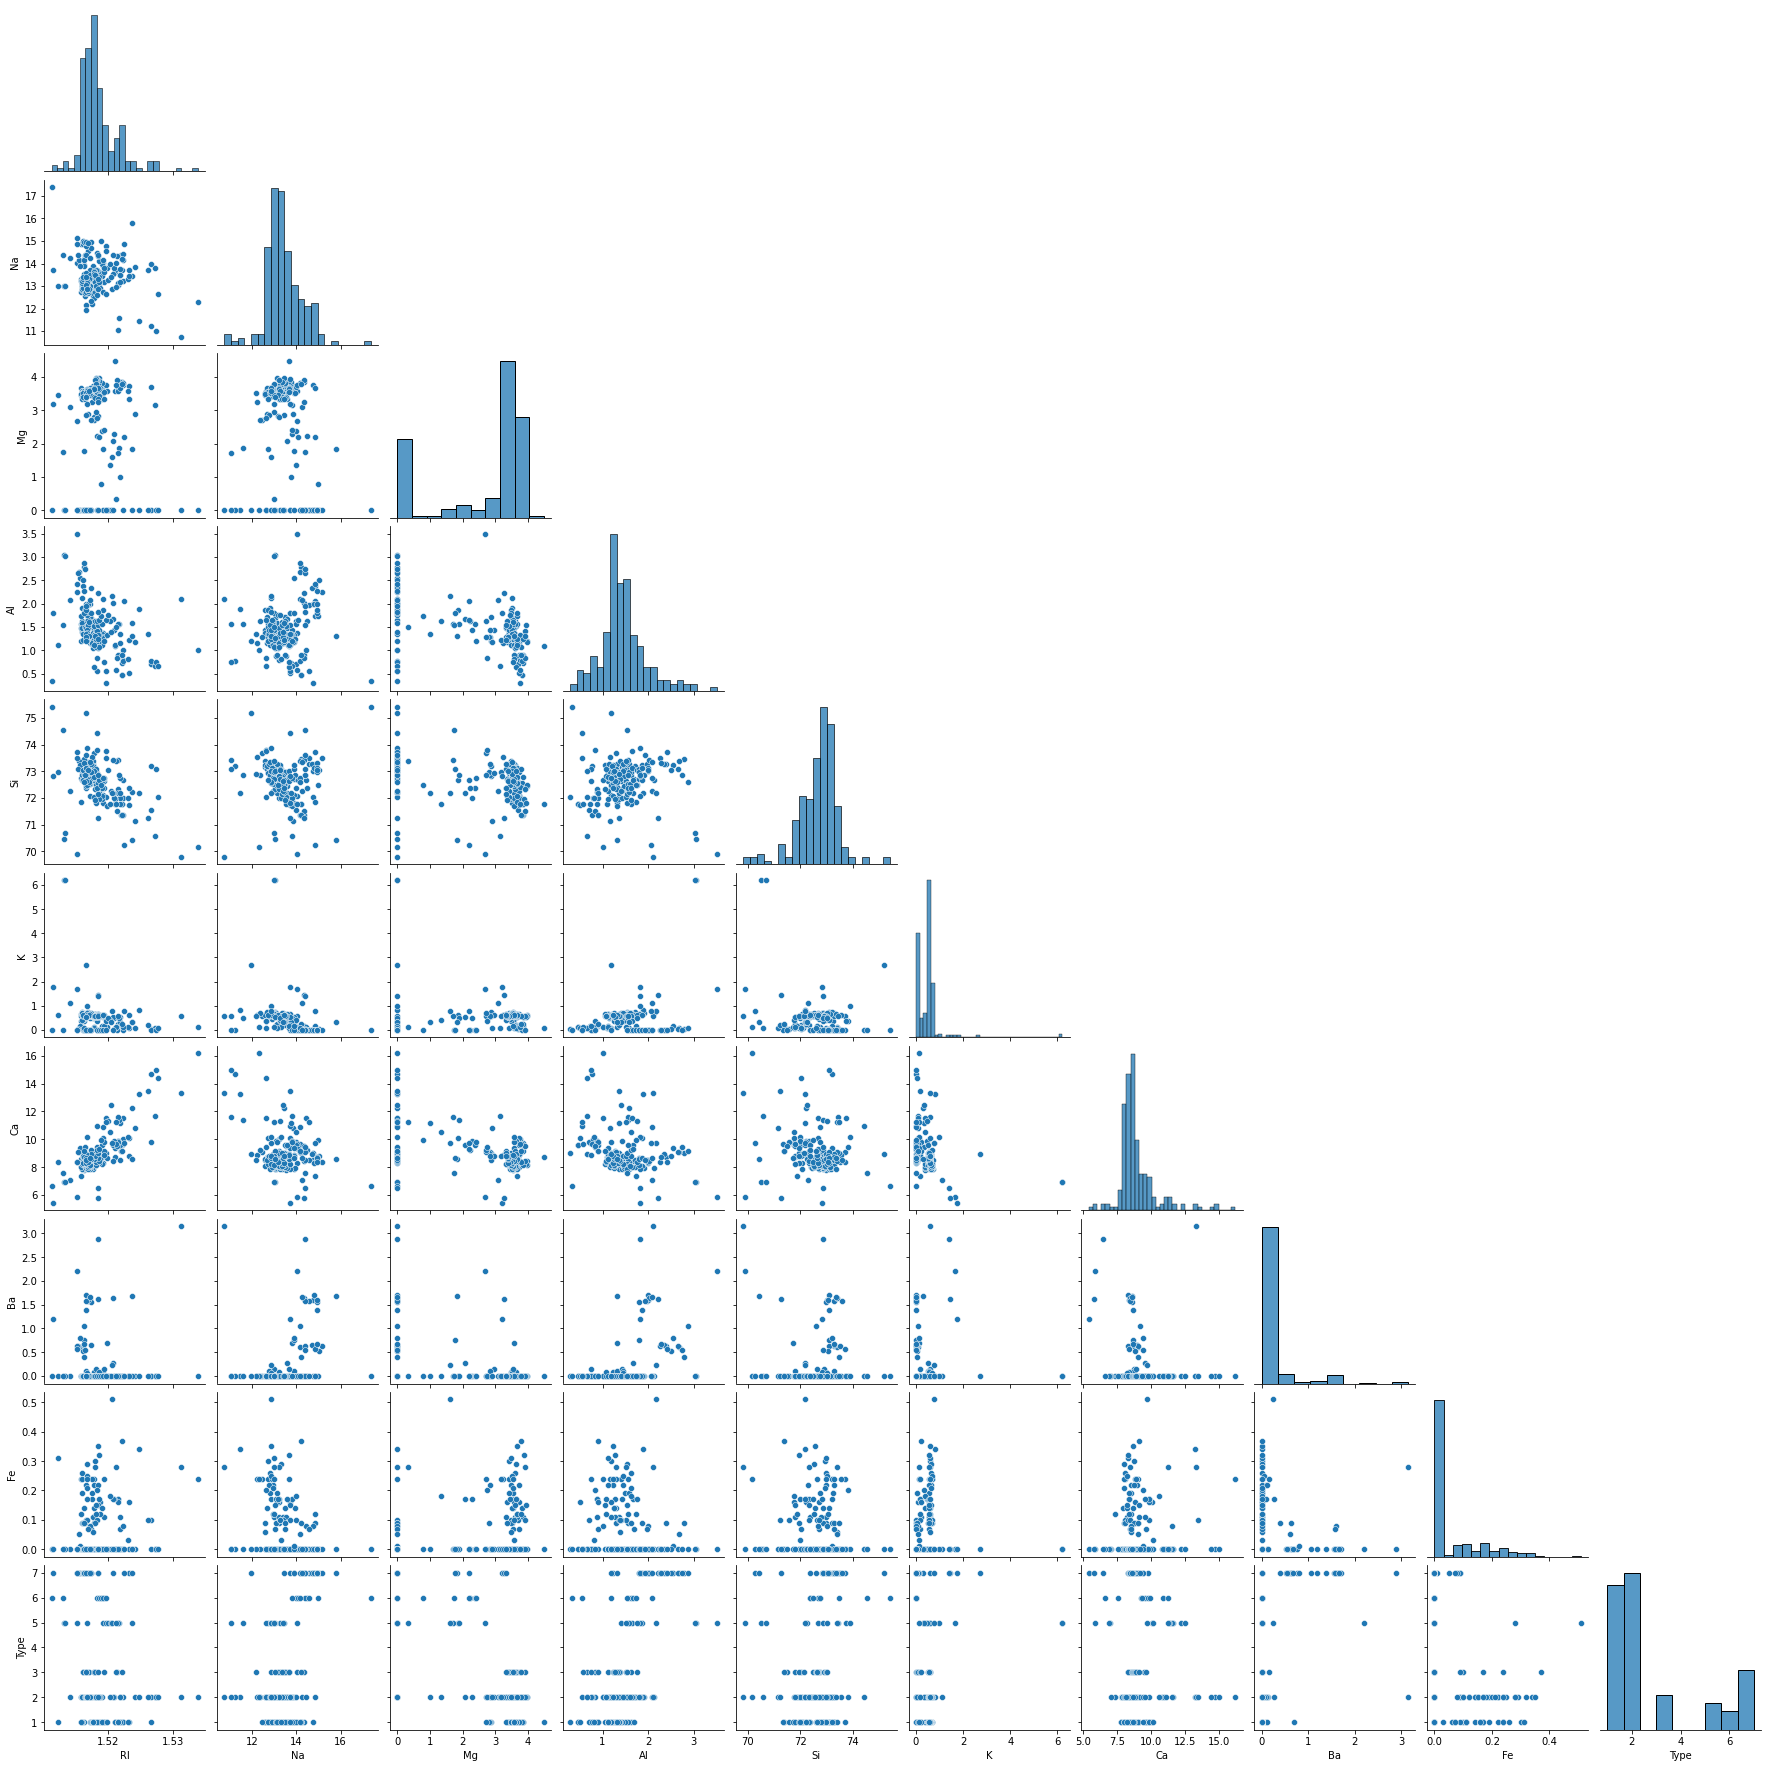

In [5]:
sns.pairplot(glass,corner=True)

(<AxesSubplot:>,)

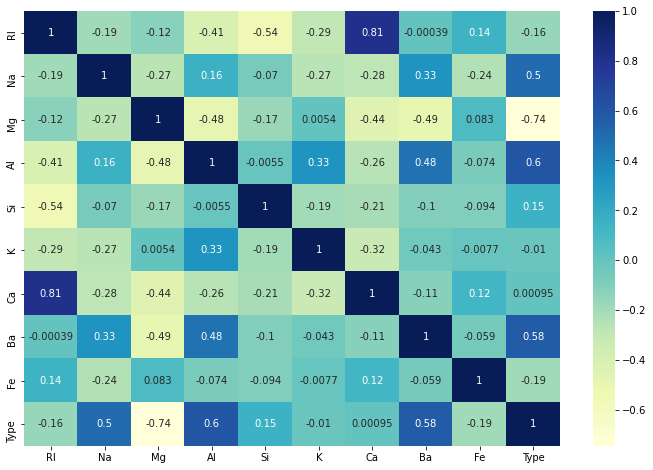

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(glass.corr(),annot=True, cmap='YlGnBu'), #correlation

<AxesSubplot:xlabel='Type', ylabel='count'>

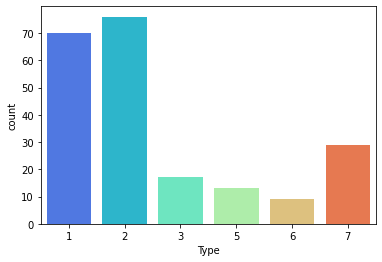

In [7]:
sns.countplot(x=glass['Type'], palette='rainbow')

<AxesSubplot:xlabel='RI', ylabel='Si'>

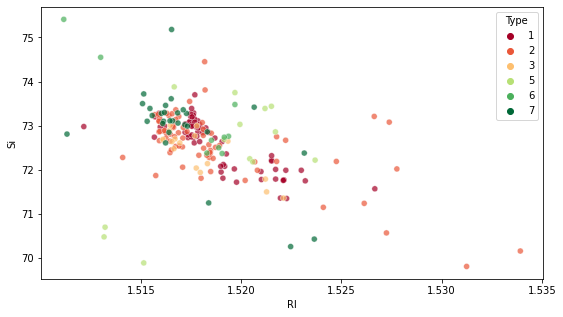

In [8]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='RI', y='Si', hue='Type', data=glass, alpha=0.7, palette='RdYlGn')

<AxesSubplot:xlabel='Al', ylabel='Mg'>

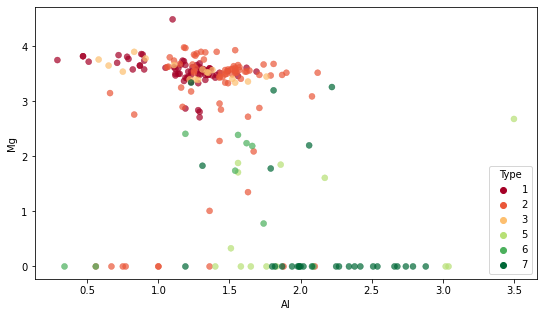

In [9]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='Al', y='Mg', data=glass, hue='Type',
                palette='RdYlGn', edgecolor=None,alpha=0.7)

<AxesSubplot:ylabel='Density'>

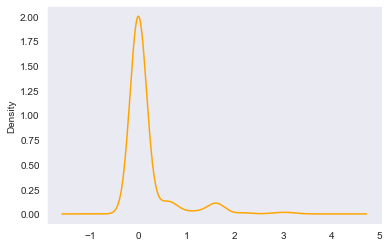

In [10]:
sns.set_style('dark')
glass['Ba'].plot(kind='kde', color='orange')

<AxesSubplot:xlabel='Type', ylabel='Al'>

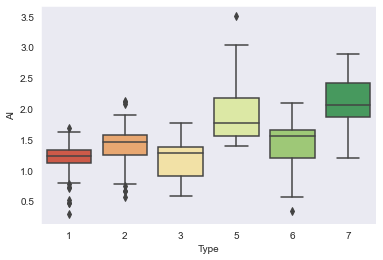

In [11]:
sns.boxplot(x='Type', y='Al', data=glass, palette='RdYlGn')

### Feature Scaling and Train Test Split

In [12]:
scaler = StandardScaler()

X = scaler.fit_transform(glass.drop('Type', axis=1))
y = glass['Type']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### KNN Model 

In [14]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

KNeighborsClassifier()

### Predictions and Evaluations


In [15]:
pred = knn.predict(X_test)

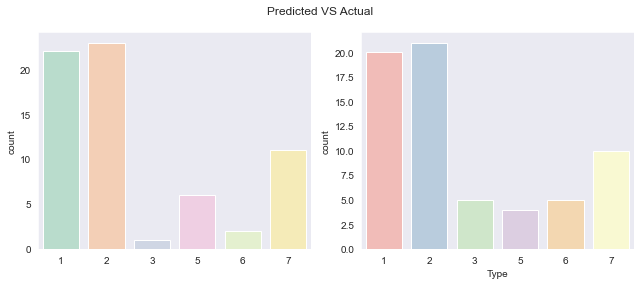

In [16]:
f, axs = plt.subplots(1,2, figsize=(9,4))
f.suptitle("Predicted VS Actual")

sns.countplot(x=pred, ax=axs[0], palette='Pastel2')
sns.countplot(x=y_test, ax=axs[1], palette='Pastel1')
f.tight_layout()

### Choosing a K Value


In [17]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

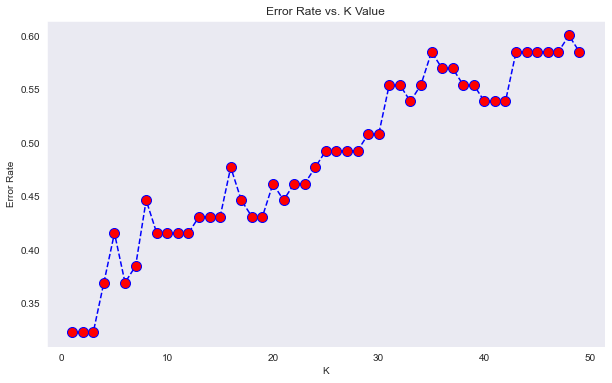

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### New K Value

In [19]:
knn_1 = KNeighborsClassifier(n_neighbors=3)

knn_1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
knn1_pred = knn_1.predict(X_test)

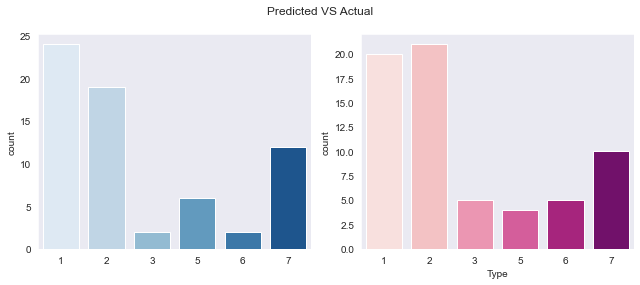

In [21]:
f, axs = plt.subplots(1,2, figsize=(9,4))
f.suptitle("Predicted VS Actual")

sns.countplot(x=knn1_pred, ax=axs[0], palette='Blues')
sns.countplot(x=y_test, ax=axs[1], palette='RdPu')
f.tight_layout()

Thank you!